# Neurologisk Klinik - DashBoard
## Predictive Analysis
---

**Synapse Solutions**
```
Team Members:  
- Agnes Rehn 
- Alhaan Kasi
- Guilherme Gryschek
- Nchedochukwu Uzoigwe
- Ning Gai
- Sreeja Nair

```

#### Early detection of the disease and risk prevention

The predictive models will be able to foresee an Alzheimer's diagnosis, making it easier for health care workers to identify risk patients,  which can lead to earlier treatment plans and better patient outcomes. 

### Machine Learning (ML) Task
- Predict Diagnosis of Alzheimer's Disease using NK Dataset

## Set Up
Install Packages

In [279]:
# Install all packages for this script
!pip install numpy pandas skimpy matplotlib sklearn seaborn plotly shap xgboost imblearn

You should consider upgrading via the 'C:\Users\ggrys\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [280]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import shap


### Loading Dataset

In [281]:
# Load Data set
# Define a dictionary mapping columns to data types
# Load the dictionary from the text file

df_ml = pd.read_csv("./df_ml.csv", sep=",",true_values =["yes"], false_values=["no"])
df_ml.shape

(2149, 24)

In [282]:
# Checking Variables and Data Types
df_ml.dtypes

Age                          int64
Gender                       int64
EducationLevel               int64
BMI                        float64
Smoking                       bool
AlcoholConsumption           int64
PhysicalActivity             int64
DietQuality                  int64
SleepQuality                 int64
FamilyHistoryAlzheimers       bool
Diabetes                      bool
Depression                    bool
Hypertension                  bool
CholesterolTotal           float64
MMSE                         int64
ADL                        float64
Diagnosis                     bool
ImpairmentLevel              int64
DependencyLevel              int64
WeightStatus                 int64
Caucasian                     bool
Black                         bool
Asian                         bool
Other                         bool
dtype: object

In [283]:
df_ml.sample(5)

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,MMSE,ADL,Diagnosis,ImpairmentLevel,DependencyLevel,WeightStatus,Caucasian,Black,Asian,Other
1560,73,1,1,17.97,False,3,7,10,9,False,...,10,8.72,True,0,4,1,True,False,False,False
823,64,1,1,30.35,False,2,4,3,8,True,...,13,1.74,True,1,0,4,False,False,True,False
932,63,0,0,39.77,False,2,0,2,5,False,...,22,5.08,True,2,2,5,False,False,False,True
904,73,1,2,26.77,False,17,3,2,7,False,...,23,1.36,False,2,0,3,True,False,False,False
1018,81,0,0,34.64,False,7,2,5,9,False,...,10,3.39,False,0,1,4,True,False,False,False


#### Target Variable
- Diagnosis

#### Feature Variables 

- Age
- Gender
- EducationLevel
- BMI
- Smoking
- AlcoholConsumption
- PhysicalActivity
- DietQuality
- SleepQuality,
- FamilyHistoryAlzheimers
- Diabetes
- Depression 
- Hypertension
- CholesterolTotal
- MMSE
- ADL
- ImpairmentLevel
- DependencyLevel
- WeightStatus
- Ethnicity (Caucasian, Black, Asian, Other)

#### Normalize Data

In [284]:
"""
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# NOTE: Only the data with features is normalized, the class labels do not need normalization.
# Select only the numerical continuous variables for normalization
numerical_continuous_columns = ["Age", "AlcoholConsumption","PhysicalActivity" ,"DietQuality","SleepQuality", 
                                "CholesterolTotal", "ADL", "MMSE"]
df_ml[numerical_continuous_columns] = scaler.fit_transform(df_ml[numerical_continuous_columns])
"""

'\n# Normalize the data\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\n\n# NOTE: Only the data with features is normalized, the class labels do not need normalization.\n# Select only the numerical continuous variables for normalization\nnumerical_continuous_columns = ["Age", "AlcoholConsumption","PhysicalActivity" ,"DietQuality","SleepQuality", \n                                "CholesterolTotal", "ADL", "MMSE"]\ndf_ml[numerical_continuous_columns] = scaler.fit_transform(df_ml[numerical_continuous_columns])\n'

#### Checking Class Imbalance

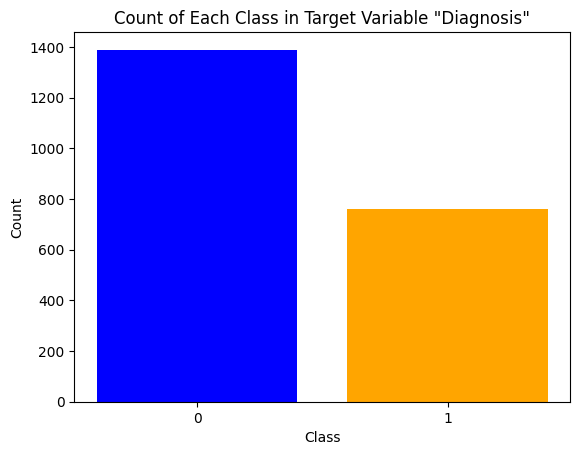

Class 0: Count = 1389, Proportion = 0.6463
Class 1: Count = 760, Proportion = 0.3537


In [285]:
#Creating the arrays for ML
ml_features = df_ml.drop(columns = ["Diagnosis"]).values
ml_target = df_ml["Diagnosis"].values

# Count the occurrences of each class label
unique_classes, class_counts = np.unique(ml_target, return_counts=True)

custom_colors = ['blue', 'orange'] 

# Plot the bar chart
plt.bar(unique_classes, class_counts, color = custom_colors)

# Add title and labels
plt.title('Count of Each Class in Target Variable "Diagnosis"')
plt.xlabel('Class')
plt.ylabel('Count')

# Customize the x-axis labels
plt.xticks([0, 1], ['0', '1'])

# Show the plot
plt.show()

# Count the occurrences of each class
class_counts = np.bincount(ml_target)

# Calculate the proportions of each class
total_instances = len(ml_target)
class_proportions = class_counts / total_instances

# Print the counts and proportions
for class_label, count, proportion in zip(range(len(class_counts)), class_counts, class_proportions):
    print(f"Class {class_label}: Count = {count}, Proportion = {proportion:.4f}")

- **Target Variable shows Class Imbalance**

### Split Dataset -> Train / Test

In [286]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Random seed to ensure reproducibility
RANDOM_SEED = 42

# Assume df_ml is your full dataset containing features and 'Diagnosis' as target
# X: Features, y: Target
X = df_ml.drop('Diagnosis', axis=1)  # Dropping target column
y = df_ml['Diagnosis']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data (do NOT fit on the test data to prevent data leakage)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Apply the same scaler transformation to the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Creating ML Models

In [287]:
#Import ML Methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [288]:
#Creating the classifier models

models = {
    "DT_1": DecisionTreeClassifier(max_depth=3),
    "DT_2": DecisionTreeClassifier(max_depth=8),
    "RF_1": RandomForestClassifier(n_estimators=10, max_depth=3),
    "RF_2": RandomForestClassifier(n_estimators=15, max_depth=7),
    "KNN_1": KNeighborsClassifier(n_neighbors=3),
    "KNN_2": KNeighborsClassifier(n_neighbors=7),
    "SVM_linear": SVC(kernel='linear'),
    "SVM_rbf": SVC(kernel='rbf', class_weight='balanced'),
    "SVM_poly": SVC(kernel='poly', degree=3, C=1.0),
    "GNB": GaussianNB(),
    "MNB": MultinomialNB(),
    "GB_1": GradientBoostingClassifier(n_estimators=100),
    "XGB_1": XGBClassifier(n_estimators=100, learning_rate=0.1),
    "AdaBoost_1": AdaBoostClassifier(n_estimators=50),
    "ET_1": ExtraTreesClassifier(n_estimators=100)
}

# We can iterate over the dictionary as follows:
for name, classifier in models.items():
    print("Classifier:", name, " ; Sklearn object:", classifier)

Classifier: DT_1  ; Sklearn object: DecisionTreeClassifier(max_depth=3)
Classifier: DT_2  ; Sklearn object: DecisionTreeClassifier(max_depth=8)
Classifier: RF_1  ; Sklearn object: RandomForestClassifier(max_depth=3, n_estimators=10)
Classifier: RF_2  ; Sklearn object: RandomForestClassifier(max_depth=7, n_estimators=15)
Classifier: KNN_1  ; Sklearn object: KNeighborsClassifier(n_neighbors=3)
Classifier: KNN_2  ; Sklearn object: KNeighborsClassifier(n_neighbors=7)
Classifier: SVM_linear  ; Sklearn object: SVC(kernel='linear')
Classifier: SVM_rbf  ; Sklearn object: SVC(class_weight='balanced')
Classifier: SVM_poly  ; Sklearn object: SVC(kernel='poly')
Classifier: GNB  ; Sklearn object: GaussianNB()
Classifier: MNB  ; Sklearn object: MultinomialNB()
Classifier: GB_1  ; Sklearn object: GradientBoostingClassifier()
Classifier: XGB_1  ; Sklearn object: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsa

In [289]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_models(models, X_train, y_train, X_test, y_test, results_df):
    """
    Evaluates multiple classifiers, recording training time, prediction time, and performance metrics.

    Args:
        models (dict): Dictionary of classifiers with names as keys and model objects as values.
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training labels.
        X_test (pd.DataFrame): Testing features.
        y_test (pd.Series): Testing labels.
        results_df (pd.DataFrame): DataFrame to store the results.
        
    Returns:
        pd.DataFrame: Updated DataFrame with the classifier performance and timings.
    """
    for name, classifier in models.items():
        
        # Step 1: Measure training time
        t_start = time.time()
        classifier.fit(X_train, y_train)
        t_end = time.time()
        training_time = t_end - t_start

        # Step 2: Measure prediction time
        t_start = time.time()
        y_predicted = classifier.predict(X_test)
        t_end = time.time()
        prediction_time = t_end - t_start

        # Step 3: Calculate performance metrics
        accuracy_result = accuracy_score(y_test, y_predicted)
        precision_result = precision_score(y_test, y_predicted, zero_division=1)
        recall_result = recall_score(y_test, y_predicted)
        f1_result = f1_score(y_test, y_predicted)

        # Step 4: Create a DataFrame with this result
        this_result = pd.DataFrame({
                        "classifier_name": [name],
                        "training_time": [training_time],
                        "prediction_time": [prediction_time],
                        "accuracy": [accuracy_result],
                        "precision": [precision_result],
                        "recall": [recall_result],
                        "f1": [f1_result]
                        })

        # Step 5: Append to the results DataFrame
        results_df = pd.concat([results_df, this_result], axis=0, ignore_index=True)
    
    return results_df

In [290]:
# Test ML Model keeping Class Imbalance

# Initialize an empty DataFrame for storing results
results_ml_1 = pd.DataFrame(columns=["classifier_name", "training_time", "prediction_time", "accuracy", "precision", "recall", "f1"])

# Call the function to evaluate all models
results_ml_1 = evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test, results_ml_1)

#Time Metrics
classifier_summary_1 = results_ml_1.groupby(by=["classifier_name"]).first()

# Create new features
classifier_summary_1["total_time"] = classifier_summary_1["training_time"] + classifier_summary_1["prediction_time"]

C:\Users\ggrys\AppData\Local\Temp\ipykernel_48316\87667221.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, this_result], axis=0, ignore_index=True)
c:\Users\ggrys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [291]:
import matplotlib.pyplot as plt 
import pandas as pd

def plot_model_results(results_df):
    """
    Plots the timing and performance metrics for classifiers with their names as labels.
    Also displays a summary table with all metrics below the charts.

    Args:
        results_df (pd.DataFrame): DataFrame containing the classifiers' performance and timing metrics.
                                   The index should be set to classifier names for proper labeling.
    """
    
    # Ensure that the classifier names are used as index
    classifiers = results_df['classifier_name'] if 'classifier_name' in results_df.columns else results_df.index

    # Plot timing metrics in a single chart
    cols_timing = ["training_time", "prediction_time"]

    # Create a grouped bar plot for timing metrics
    ax = results_df[cols_timing].plot.bar(
        figsize=(10, 6),
        color=['#FF5733', '#33FF57'],  # Custom colors for clarity
        width=0.8
    )
    
    # Set classifier names as tick labels for timing plots
    ax.set_xticklabels(classifiers, rotation=45, ha="right")  # Rotate labels for better readability

    # Main labels for timing plot
    plt.title("Time Taken per Classifier", fontsize=16)
    plt.xlabel("Classifier", fontsize=12)
    plt.ylabel("Time (s)", fontsize=12)
    plt.legend(title='Metrics', fontsize=10)  # Show legend for training and prediction time
    plt.tight_layout()
    plt.show()

    # Plot performance metrics
    cols_performance = ["accuracy", "precision", "recall", "f1"]

    # Create a bar plot for performance metrics
    ax2 = results_df[cols_performance].plot.bar(
        subplots=False,
        cmap="viridis",
        figsize=(10, 6),
        legend=True
    )
    
    # Set classifier names as tick labels for performance plot
    ax2.set_xticklabels(classifiers, rotation=45, ha="right")  # Rotate labels for better readability

    # Main labels for performance plot
    plt.title("Predictive Performance per Classifier", fontsize=16)
    plt.xlabel("Classifier", fontsize=12)
    plt.ylabel("Performance Metrics", fontsize=12)
    plt.legend(bbox_to_anchor=(1, 1))  # Show legend outside the chart
    plt.tight_layout()
    plt.show()

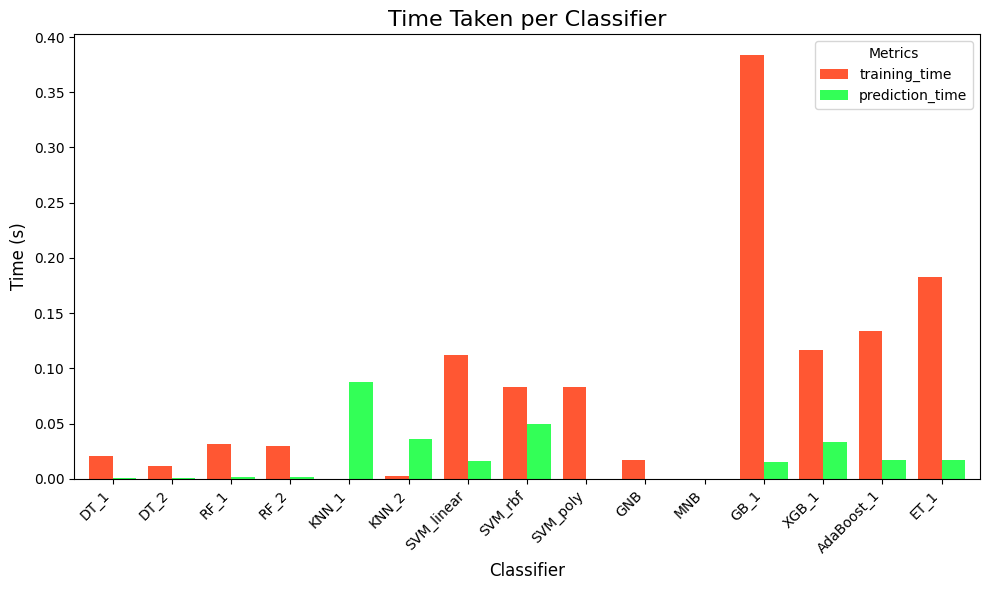

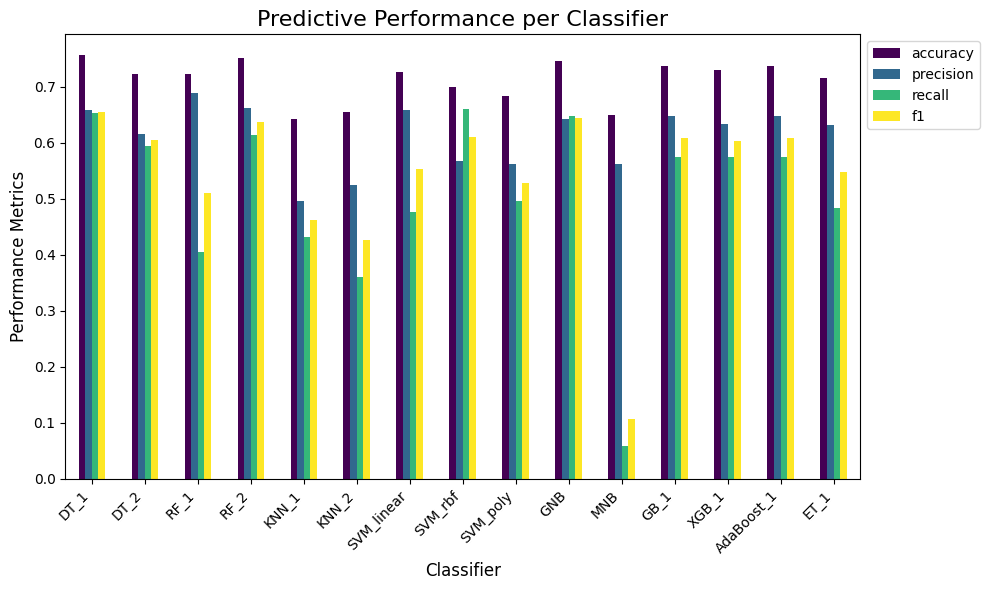

,training_time,prediction_time,accuracy,precision,recall,f1,total_time
classifier_name,,,,,,,
AdaBoost_1,0.133842,0.016697,0.737209,0.647059,0.575163,0.608997,0.150538
DT_1,0.020329,0.001083,0.755814,0.657895,0.653595,0.655738,0.021412
DT_2,0.011181,0.001107,0.723256,0.614865,0.594771,0.604651,0.012288
ET_1,0.182836,0.017189,0.716279,0.632479,0.483660,0.548148,0.200024
GB_1,0.383254,0.015020,0.737209,0.647059,0.575163,0.608997,0.398274
GNB,0.016853,0.000000,0.746512,0.642857,0.647059,0.644951,0.016853
KNN_1,0.000000,0.087891,0.641860,0.496241,0.431373,0.461538,0.087891
KNN_2,0.002320,0.035666,0.655814,0.523810,0.359477,0.426357,0.037986
MNB,0.000000,0.000000,0.648837,0.562500,0.058824,0.106509,0.000000


In [292]:
#Ploting classifier evaluation results
plot_model_results(results_ml_1)

classifier_summary_1

To enhance model performance, we will apply the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance. SMOTE generates synthetic samples for the minority class, helping to balance class distribution and reduce bias toward the majority class. This approach improves predictive accuracy and generalization, especially in scenarios where the minority class is underrepresented.

#### SMOTE: synthetic minority over-sampling technique

In [293]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=RANDOM_SEED)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

"""
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data (do NOT fit on the test data to prevent data leakage)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Apply the same scaler transformation to the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
"""

'\n# Initialize the MinMaxScaler\nscaler = MinMaxScaler()\n\n# Fit the scaler on the training data (do NOT fit on the test data to prevent data leakage)\nX_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)\n\n# Apply the same scaler transformation to the test data\nX_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)\n'

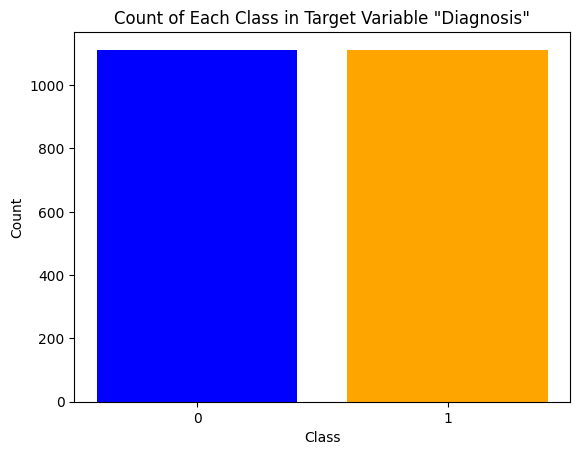

Class 0: Count = 1112, Proportion = 0.5000
Class 1: Count = 1112, Proportion = 0.5000


In [294]:
# Check the distribution of the target variable after oversampling
unique_classes, class_counts = np.unique(y_train_smote, return_counts=True)

custom_colors = ['blue', 'orange'] 

# Plot the bar chart
plt.bar(unique_classes, class_counts, color = custom_colors)

# Add title and labels
plt.title('Count of Each Class in Target Variable "Diagnosis"')
plt.xlabel('Class')
plt.ylabel('Count')

# Customize the x-axis labels
plt.xticks([0, 1], ['0', '1'])

# Show the plot
plt.show()

# Count the occurrences of each class
class_counts = np.bincount(y_train_smote)

# Calculate the proportions of each class
total_instances = len(y_train_smote)
class_proportions = class_counts / total_instances

# Print the counts and proportions
for class_label, count, proportion in zip(range(len(class_counts)), class_counts, class_proportions):
    print(f"Class {class_label}: Count = {count}, Proportion = {proportion:.4f}")

In [295]:
# Test ML Model after applying SMOTE technique to solve Class Imbalance

# Initialize an empty DataFrame for storing results
results_ml_2 = pd.DataFrame(columns=["classifier_name", "training_time", "prediction_time", "accuracy", "precision", "recall", "f1"])

# Call the function to evaluate all models
results_ml_2 = evaluate_models(models, X_train_smote, y_train_smote, X_test_scaled, y_test, results_ml_2)

#Time Metrics
classifier_summary_2 = results_ml_2.groupby(by=["classifier_name"]).first()

# Create new features
classifier_summary_2["total_time"] = classifier_summary_2["training_time"] + classifier_summary_2["prediction_time"]

C:\Users\ggrys\AppData\Local\Temp\ipykernel_48316\87667221.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, this_result], axis=0, ignore_index=True)
c:\Users\ggrys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


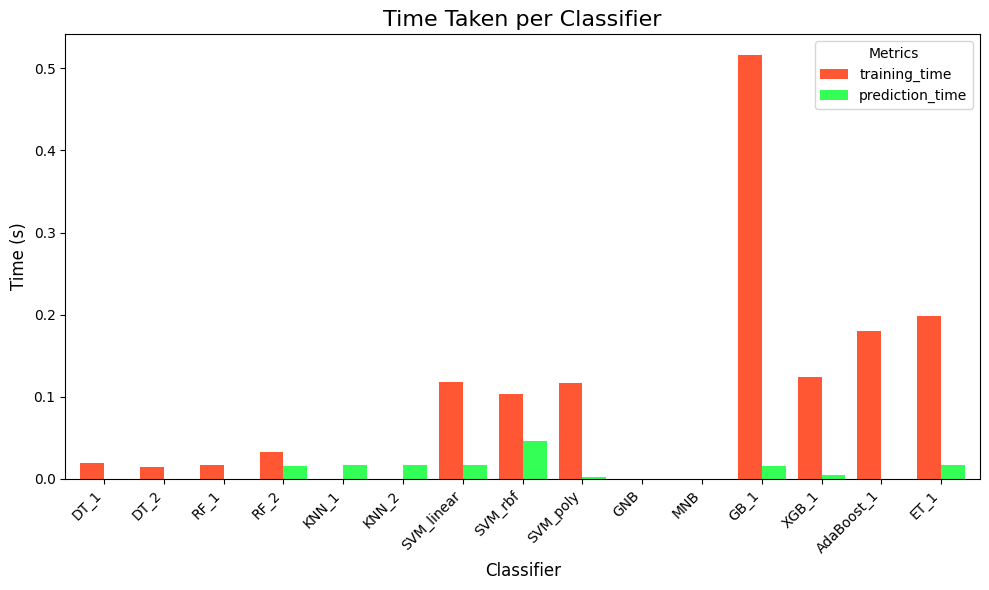

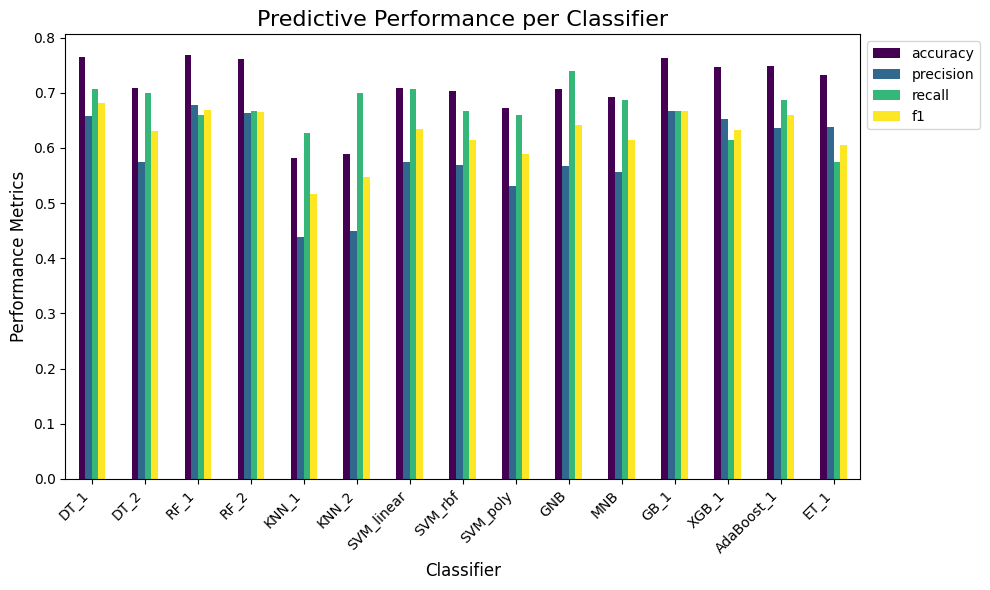

,training_time,prediction_time,accuracy,precision,recall,f1,total_time
classifier_name,,,,,,,
AdaBoost_1,0.179791,0.000000,0.748837,0.636364,0.686275,0.660377,0.179791
DT_1,0.018922,0.000000,0.765116,0.658537,0.705882,0.681388,0.018922
DT_2,0.014315,0.000000,0.709302,0.575269,0.699346,0.631268,0.014315
ET_1,0.197739,0.016454,0.732558,0.637681,0.575163,0.604811,0.214194
GB_1,0.515647,0.015587,0.762791,0.666667,0.666667,0.666667,0.531234
GNB,0.000000,0.000000,0.706977,0.567839,0.738562,0.642045,0.000000
KNN_1,0.000000,0.016271,0.581395,0.438356,0.627451,0.516129,0.016271
KNN_2,0.000000,0.016858,0.588372,0.449580,0.699346,0.547315,0.016858
MNB,0.000000,0.000000,0.693023,0.555556,0.686275,0.614035,0.000000


In [296]:
#Ploting classifier evaluation results
plot_model_results(results_ml_2)

classifier_summary_2

#### Selecting the Best Model

In [297]:
# Step 1: Identify the best model based on the highest F1 score
best_model_name = classifier_summary_2['f1'].idxmax()  # Model with the highest F1 score
best_model = models[best_model_name]  # Retrieve the corresponding model

# Step 2: Print all the metrics for the best model
print(f"The best model is: {best_model_name} with the following metrics:")
print(classifier_summary_2.loc[best_model_name, ["accuracy", "precision", "recall", "f1"]])

The best model is: DT_1 with the following metrics:
accuracy     0.765116
precision    0.658537
recall       0.705882
f1           0.681388
Name: DT_1, dtype: float64


In [298]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    """
    Plots the ROC curve and calculates the AUC score for a binary classification model.

    Args:
        model: Trained model (must support `predict_proba`).
        X_test (pd.DataFrame or np.array): Test set features.
        y_test (pd.Series or np.array): True labels for the test set.
    
    Returns:
        float: The AUC score of the model.
    """
    # Step 1: Predict the probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]  # Get the probability for class 1
    
    # Step 2: Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Step 3: Calculate AUC (Area Under the Curve)
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc_score:.2f}")
    
    # Step 4: Plot the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
    
    # Add labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    # Show the plot
    plt.show()
    
    return auc_score

AUC Score: 0.79


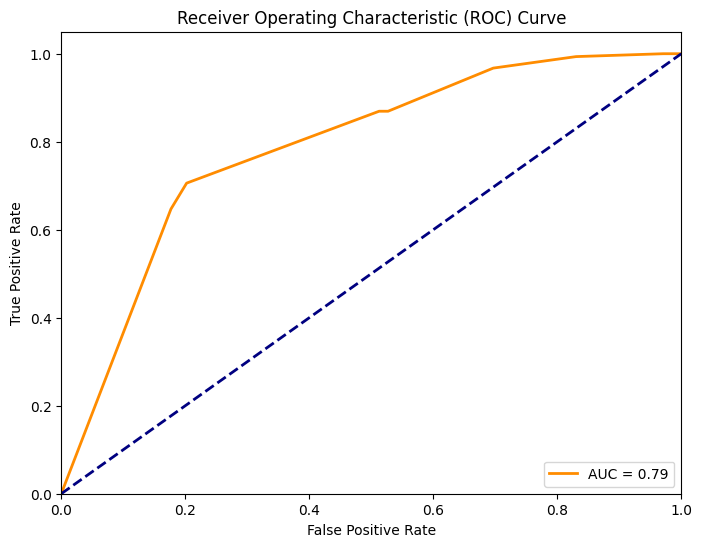

0.7873811377740025

In [299]:
plot_roc_curve(best_model, X_test_scaled, y_test)

### Checking for Feature Importance for Model training

                    Feature  Importance
15                      ADL     0.17000
14                     MMSE     0.10186
0                       Age     0.00000
12             Hypertension     0.00000
21                    Asian     0.00000
20                    Black     0.00000
19                Caucasian     0.00000
18             WeightStatus     0.00000
17          DependencyLevel     0.00000
16          ImpairmentLevel     0.00000
13         CholesterolTotal     0.00000
11               Depression     0.00000
1                    Gender     0.00000
10                 Diabetes     0.00000
9   FamilyHistoryAlzheimers     0.00000
8              SleepQuality     0.00000
7               DietQuality     0.00000
6          PhysicalActivity     0.00000
5        AlcoholConsumption     0.00000
4                   Smoking     0.00000
3                       BMI     0.00000
2            EducationLevel     0.00000
22                    Other     0.00000


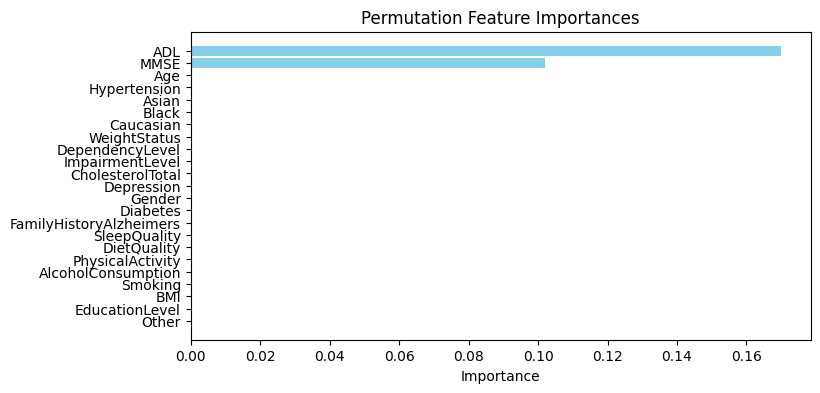

In [300]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_test is a DataFrame and contains your feature names
data_input_template = X_test_scaled.columns.tolist()  # Extract feature names from the DataFrame

# Calculate permutation importance
perm_importance = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=RANDOM_SEED)

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': data_input_template,
    'Importance': perm_importance.importances_mean
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Permutation Feature Importances')
plt.show()

In [301]:
# Set a threshold for feature selection: the Models will be retrained using the most important features
threshold = 0.01  # Select features with importance > 0.01

# Step 2: Filter the features that have importance above the threshold
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].values

In [302]:
important_features

array(['ADL', 'MMSE'], dtype=object)

The models will be trained again, using just the most important features for prediction

In [303]:
# Select the important features from the training and testing datasets
X_train_filtered = X_train_smote[important_features]
X_test_filtered = X_test_scaled[important_features]

In [304]:
# Function to train and evaluate just the final model
def evaluate_single_model(model, X_train, y_train, X_test, y_test, results_df):
    """
    Evaluates a single classifier, recording training time, prediction time, and performance metrics.

    Parameters:
        model (object): A classifier object (e.g., DecisionTreeClassifier).
        X_train, y_train (DataFrame, Series): Training data and labels.
        X_test, y_test (DataFrame, Series): Test data and labels.
        results_df (DataFrame): DataFrame to store the evaluation results.

    Returns:
        pd.DataFrame: Updated DataFrame with the classifier performance and timings.
    """
    # Step 1: Measure training time
    t_start = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - t_start

    # Step 2: Measure prediction time
    t_start = time.time()
    predictions = model.predict(X_test)
    prediction_time = time.time() - t_start

    # Step 3: Compute performance metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Step 4: Create a DataFrame for the new result
    new_result = pd.DataFrame({
        "classifier_name": [model.__class__.__name__],
        "training_time": [training_time],
        "prediction_time": [prediction_time],
        "accuracy": [accuracy],
        "precision": [precision],
        "recall": [recall],
        "f1": [f1]
    })

    # Step 5: Use pd.concat to add the new result to the existing results DataFrame
    results_df = pd.concat([results_df, new_result], ignore_index=True)

    return results_df

In [305]:
# Initialize an empty DataFrame for storing results
results_ml_3 = pd.DataFrame(columns=["classifier_name", "training_time", "prediction_time", "accuracy", "precision", "recall", "f1"])

final_model = models[best_model_name]

# Call the function to evaluate all models
results_ml_3 = evaluate_single_model(final_model, X_train_filtered, y_train_smote, X_test_filtered, y_test, results_ml_3)

#Time Metrics
classifier_summary_3 = results_ml_3.groupby(by=["classifier_name"]).first()

# Create new features
classifier_summary_3["total_time"] = classifier_summary_3["training_time"] + classifier_summary_3["prediction_time"]

C:\Users\ggrys\AppData\Local\Temp\ipykernel_48316\1088462964.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_result], ignore_index=True)


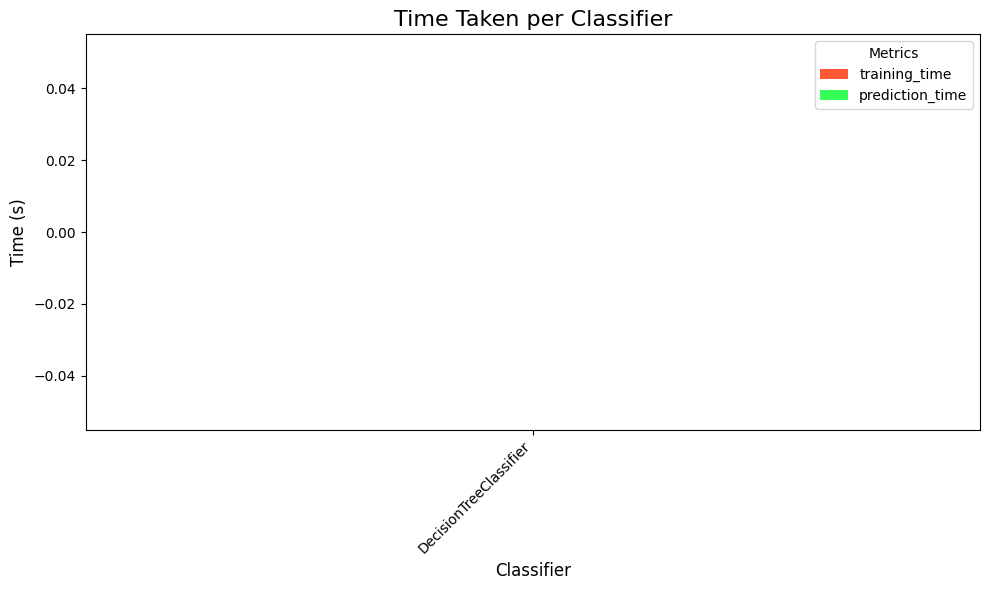

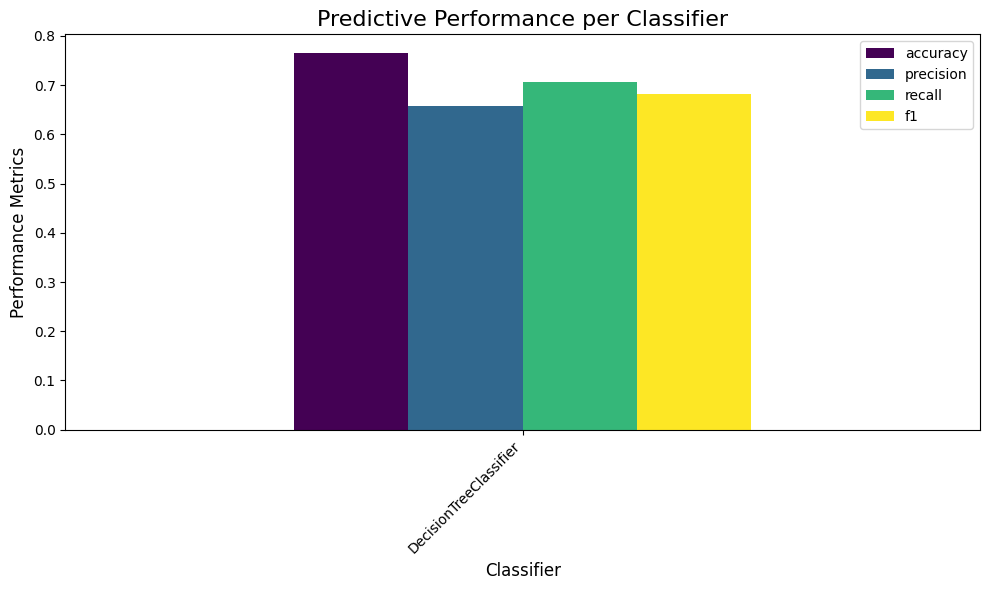

,training_time,prediction_time,accuracy,precision,recall,f1,total_time
classifier_name,,,,,,,
DecisionTreeClassifier,0.0,0.0,0.765116,0.658537,0.705882,0.681388,0.0


In [306]:
plot_model_results(results_ml_3)

classifier_summary_3

AUC Score: 0.79


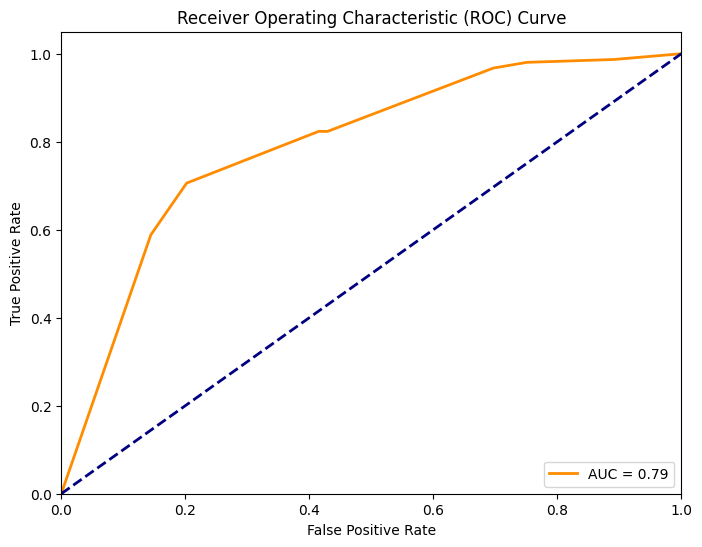

0.7926547273542389

In [307]:
plot_roc_curve(final_model, X_test_filtered, y_test)

### Export Model

In [308]:
import pickle
# Export the best model using pickle
with open(f'best_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

print(f"Model '{final_model}' has been saved as 'best_model.pkl'.")

Model 'DecisionTreeClassifier(max_depth=3)' has been saved as 'best_model.pkl'.


In [309]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Assuming X_train is your training data
scaler = MinMaxScaler()

X_train_filtered_scaled = X_train[["ADL","MMSE"]]

scaler.fit(X_train_filtered_scaled)  # Fit the scaler on the training data

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### SIMULATING PREDICTION TASK WITH NEW DATA

### Prediction Task

In [310]:
import pickle
import numpy as np
import pandas as pd
import joblib

# Step 1: Load the saved model from the pickle file
with open('best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [311]:
# Load the saved scaler
scaler = joblib.load('scaler.pkl')

In [312]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.metrics import roc_auc_score

def predict_new_data(new_input, model, scaler_path='scaler.pkl'):
    """
    Scale new input data using the fitted scaler and predict using the pre-trained model.

    Args:
        new_input (list): New data input as a list [ADL, MMSE].
        model: Pre-trained machine learning model (e.g., RandomForest).
        scaler_path (str): Path to the scaler used during training.

    Returns:
        str: Prediction label ("No" or "Yes") for Alzheimer's Disease.
        float: Probability prediction for the positive class (e.g., class 1).
    """
    # Convert new input to a DataFrame
    new_data = pd.DataFrame([new_input], columns=['ADL', 'MMSE'])
    
    # Load the pre-fitted scaler
    scaler = joblib.load(scaler_path)
    
    # Normalize the new data
    new_data_scaled = pd.DataFrame(scaler.transform(new_data), columns=['ADL', 'MMSE'])
    
    # Print the original data as a table
    print("New Data:")
    print(new_data.to_string(index=False))  # Hide index for cleaner output
    
    # Predict the probability for the positive class (e.g., class 1)
    prediction_prob = model.predict_proba(new_data_scaled)[:, 1]
    
    # Convert prediction to binary label
    predicted_class = model.predict(new_data_scaled)
    label = "YES" if predicted_class[0] == 1 else "NO"
    
    # Print the prediction probability for class 1 (Yes) in terms of certainty
    certainty_percentage = prediction_prob[0] * 100
    print(f"Predicted Probability for Positive Diagnosis for Alzheimer's Disease is {certainty_percentage:.2f}%")
    print(f"Alzheimer's Disease Prediction: {label}")
    
    return label, prediction_prob[0]

In [313]:
# Just to describe the model name and metrics

# Import necessary libraries
import pandas as pd
from sklearn.metrics import roc_auc_score

# Calculate AUC Score using the test datasets
# Assuming X_test_filtered and y_test are your test datasets
y_pred_proba = loaded_model.predict_proba(X_test_filtered)[:, 1]  # Get probabilities for the positive class
auc_score = roc_auc_score(y_test, y_pred_proba)

# Retrieve model summary
classifier_summary_loaded_model = classifier_summary_3[["accuracy"]]
model_name = classifier_summary_loaded_model.index[0]  # Get the model name from the index

# Use .iloc to get accuracy by position
accuracy = classifier_summary_loaded_model['accuracy'].iloc[0]  # Get the accuracy value

# Print the model name and accuracy and AUC Score
print(f"Model: {model_name}, Accuracy: {accuracy:.2f}, AUC Score: {auc_score:.2f}")

Model: DecisionTreeClassifier, Accuracy: 0.77, AUC Score: 0.79


In [314]:
# Example usage:
# Define new data input (ADL, MMSE)

new_input = [2, 5]  

# Predict using the new input
prediction = predict_new_data(new_input, loaded_model, scaler_path='scaler.pkl')

New Data:
 ADL  MMSE
   2     5
Predicted Probability for Positive Diagnosis for Alzheimer's Disease is 79.93%
Alzheimer's Disease Prediction: YES


### SHAP NOT READY YET -> BUT THE BEST MODEL CAN BE EXPORTED 